In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder


In [15]:
all_city_cars_df=pd.read_csv(r"C:\Users\jaguh\OneDrive\Desktop\car dekho2\all_car_details.csv")
all_city_cars_df.head()

all_city_cars_df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
all_city_cars_df

,Year of car manufacture,Width,Color,kilometer driven,Transmission type,price,Body type,Length,Brand Name,Fuel type,city,Seats,Car model,Number of previous owners,Insurance Validity_value,Engine Displacement_value(cc)
0,2022,1790,Black,20000,Automatic,1150000.0,SUV,3995mm,Kia,Petrol,chennai,5.0,Kia Sonet,1,Third Party insurance,998
1,2015,1475mm,Grey,20687,Manual,415000.0,Minivans,3675mm,Maruti,Petrol,chennai,7.0,Maruti Eeco,1,Comprehensive,1196
2,2021,1758,Others,30000,Manual,750000.0,SUV,3994mm,Nissan,Petrol,chennai,5.0,Nissan Magnite,1,Third Party insurance,999
3,2015,1595mm,Silver,59247,Manual,398000.0,Hatchback,3585mm,Hyundai,Petrol,chennai,5.0,Hyundai i10,1,Comprehensive,1086
4,2015,1694mm,Others,50000,Manual,550000.0,Hatchback,3955mm,Honda,Petrol,chennai,5.0,Honda Jazz,1,Third Party insurance,1199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8278,2022,1655,Others,10000,Manual,510000.0,Hatchback,3695mm,Maruti,Petrol,Kolkata,5.0,Maruti Celerio,1,Third Party insurance,998
8279,2014,1490mm,Others,120000,Manual,180000.0,Hatchback,3395mm,Maruti,Petrol,Kolkata,5.0,Maruti Alto 800,1,Third Party insurance,796
8280,2011,1770mm,Others,50000,Automatic,550000.0,Sedan,4591mm,Mercedes-Benz,Petrol,Kolkata,5.0,Mercedes-Benz C-Class,3,Third Party insurance,1796
8281,2012,1680mm,Others,40000,Manual,140000.0,Hatchback,3775mm,Maruti,Petrol,Kolkata,5.0,Maruti Ritz,1,Third Party insurance,1197


In [17]:
all_city_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8283 entries, 0 to 8282
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year of car manufacture        8283 non-null   int64  
 1   Width                          8283 non-null   object 
 2   Color                          8283 non-null   object 
 3   kilometer driven               8283 non-null   int64  
 4   Transmission type              8283 non-null   object 
 5   price                          8283 non-null   float64
 6   Body type                      8283 non-null   object 
 7   Length                         8283 non-null   object 
 8   Brand Name                     8283 non-null   object 
 9   Fuel type                      8283 non-null   object 
 10  city                           8283 non-null   object 
 11  Seats                          8283 non-null   float64
 12  Car model                      8283 non-null   o

In [18]:

all_city_cars_df.head()

,Year of car manufacture,Width,Color,kilometer driven,Transmission type,price,Body type,Length,Brand Name,Fuel type,city,Seats,Car model,Number of previous owners,Insurance Validity_value,Engine Displacement_value(cc)
0,2022,1790,Black,20000,Automatic,1150000.0,SUV,3995mm,Kia,Petrol,chennai,5.0,Kia Sonet,1,Third Party insurance,998
1,2015,1475mm,Grey,20687,Manual,415000.0,Minivans,3675mm,Maruti,Petrol,chennai,7.0,Maruti Eeco,1,Comprehensive,1196
2,2021,1758,Others,30000,Manual,750000.0,SUV,3994mm,Nissan,Petrol,chennai,5.0,Nissan Magnite,1,Third Party insurance,999
3,2015,1595mm,Silver,59247,Manual,398000.0,Hatchback,3585mm,Hyundai,Petrol,chennai,5.0,Hyundai i10,1,Comprehensive,1086
4,2015,1694mm,Others,50000,Manual,550000.0,Hatchback,3955mm,Honda,Petrol,chennai,5.0,Honda Jazz,1,Third Party insurance,1199


encoding categorical variables

In [19]:
# Create a backup DataFrame for original categorical values
original_values_df = all_city_cars_df.select_dtypes(include=['object']).copy()

# Initialize a dictionary to store label encoders for each column
label_encoders = {}

# Loop through each categorical column
for col in all_city_cars_df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    
    # Fill missing values with the mode (most frequent value)
    mode_value = all_city_cars_df[col].mode()[0]
    all_city_cars_df[col] = all_city_cars_df[col].fillna(mode_value)
    
    # Fit and transform the column using label encoding
    all_city_cars_df[col] = label_encoder.fit_transform(all_city_cars_df[col])
    
    # Store the label encoder for future use if needed
    label_encoders[col] = label_encoder

# Display the encoded DataFrame and original values
print(all_city_cars_df.head())
print(original_values_df.head())  # Original values saved here

   Year of car manufacture  Width  Color  kilometer driven  Transmission type  \
0                     2022    139      8             20000                  0   
1                     2015     22     57             20687                  1   
2                     2021    118     86             30000                  1   
3                     2015     38    116             59247                  1   
4                     2015     70     86             50000                  1   

       price  Body type  Length  Brand Name  Fuel type  city  Seats  \
0  1150000.0          7     101          13          4     5    5.0   
1   415000.0          5      39          20          4     5    7.0   
2   750000.0          7      98          24          4     5    5.0   
3   398000.0          2      26           9          4     5    5.0   
4   550000.0          2      82           8          4     5    5.0   

   Car model  Number of previous owners  Insurance Validity_value  \
0        100     

In [20]:
# Save the label encoders to a pickle file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [21]:
all_city_cars_df.to_csv('final data.csv')

final_df=pd.read_csv(r"C:\Users\jaguh\OneDrive\Desktop\car dekho2\final data.csv")
final_df.drop('Unnamed: 0',axis=1, inplace=True)

In [22]:
final_df.describe()

,Year of car manufacture,Width,Color,kilometer driven,Transmission type,price,Body type,Length,Brand Name,Fuel type,city,Seats,Car model,Number of previous owners,Insurance Validity_value,Engine Displacement_value(cc)
count,8283.000000,8283.000000,8283.000000,8.283000e+03,8283.000000,8.283000e+03,8283.000000,8283.000000,8283.000000,8283.000000,8283.000000,8283.000000,8283.000000,8283.000000,8283.000000,8283.000000
mean,2016.477001,104.543281,88.586865,5.930105e+04,0.727273,9.304945e+05,4.965109,130.126283,16.162381,2.992394,2.443921,5.200652,128.077146,1.361825,3.773271,1424.470361
std,3.868279,64.657558,41.929870,7.432858e+04,0.445389,1.226529e+06,2.709133,92.690799,8.521594,1.431378,1.736114,0.657882,69.165507,0.642288,1.456286,467.418778
min,1985.000000,0.000000,0.000000,0.000000e+00,0.000000,2.016100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,72.000000
25%,2014.000000,57.000000,57.000000,3.057200e+04,0.000000,3.990000e+05,2.000000,55.000000,9.000000,1.000000,1.000000,5.000000,72.000000,1.000000,2.000000,1197.000000
50%,2017.000000,96.000000,86.000000,5.400000e+04,1.000000,6.000000e+05,7.000000,101.000000,17.000000,4.000000,2.000000,5.000000,131.000000,1.000000,5.000000,1248.000000
75%,2019.000000,135.000000,116.000000,8.000000e+04,1.000000,9.420000e+05,8.000000,192.500000,20.000000,4.000000,4.000000,5.000000,163.000000,2.000000,5.000000,1498.000000
max,2023.000000,307.000000,152.000000,5.500000e+06,1.000000,2.600000e+07,9.000000,402.000000,32.000000,4.000000,5.000000,10.000000,278.000000,5.000000,6.000000,5000.000000


In [23]:
final_df.columns

Index(['Year of car manufacture', 'Width', 'Color', 'kilometer driven',
       'Transmission type', 'price', 'Body type', 'Length', 'Brand Name',
       'Fuel type', 'city', 'Seats', 'Car model', 'Number of previous owners',
       'Insurance Validity_value', 'Engine Displacement_value(cc)'],
      dtype='object')

data visualization

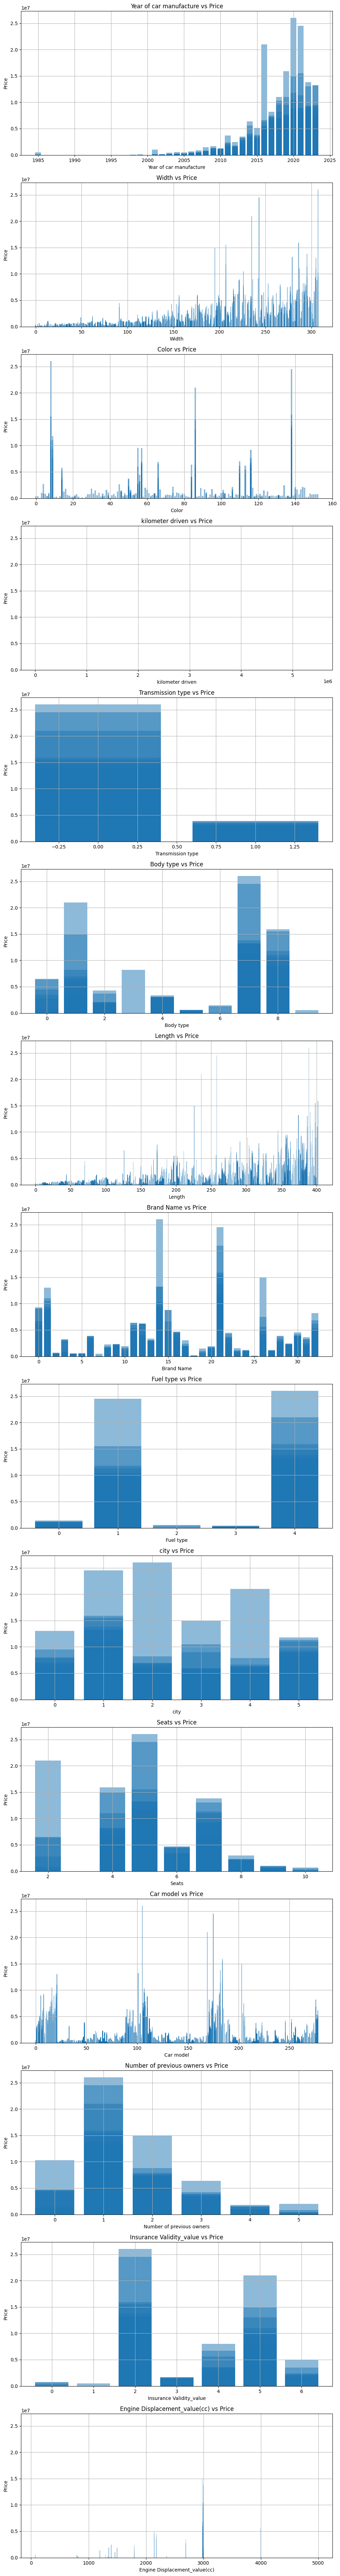

In [24]:
feature_columns = final_df.columns.drop('price')

# Create a figure with subplots
num_features = len(feature_columns)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# Loop through each feature and plot against 'price'
for ax, feature in zip(axes, feature_columns):
    ax.bar(final_df[feature], final_df['price'], alpha=0.5)
    ax.set_title(f'{feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

feature selection

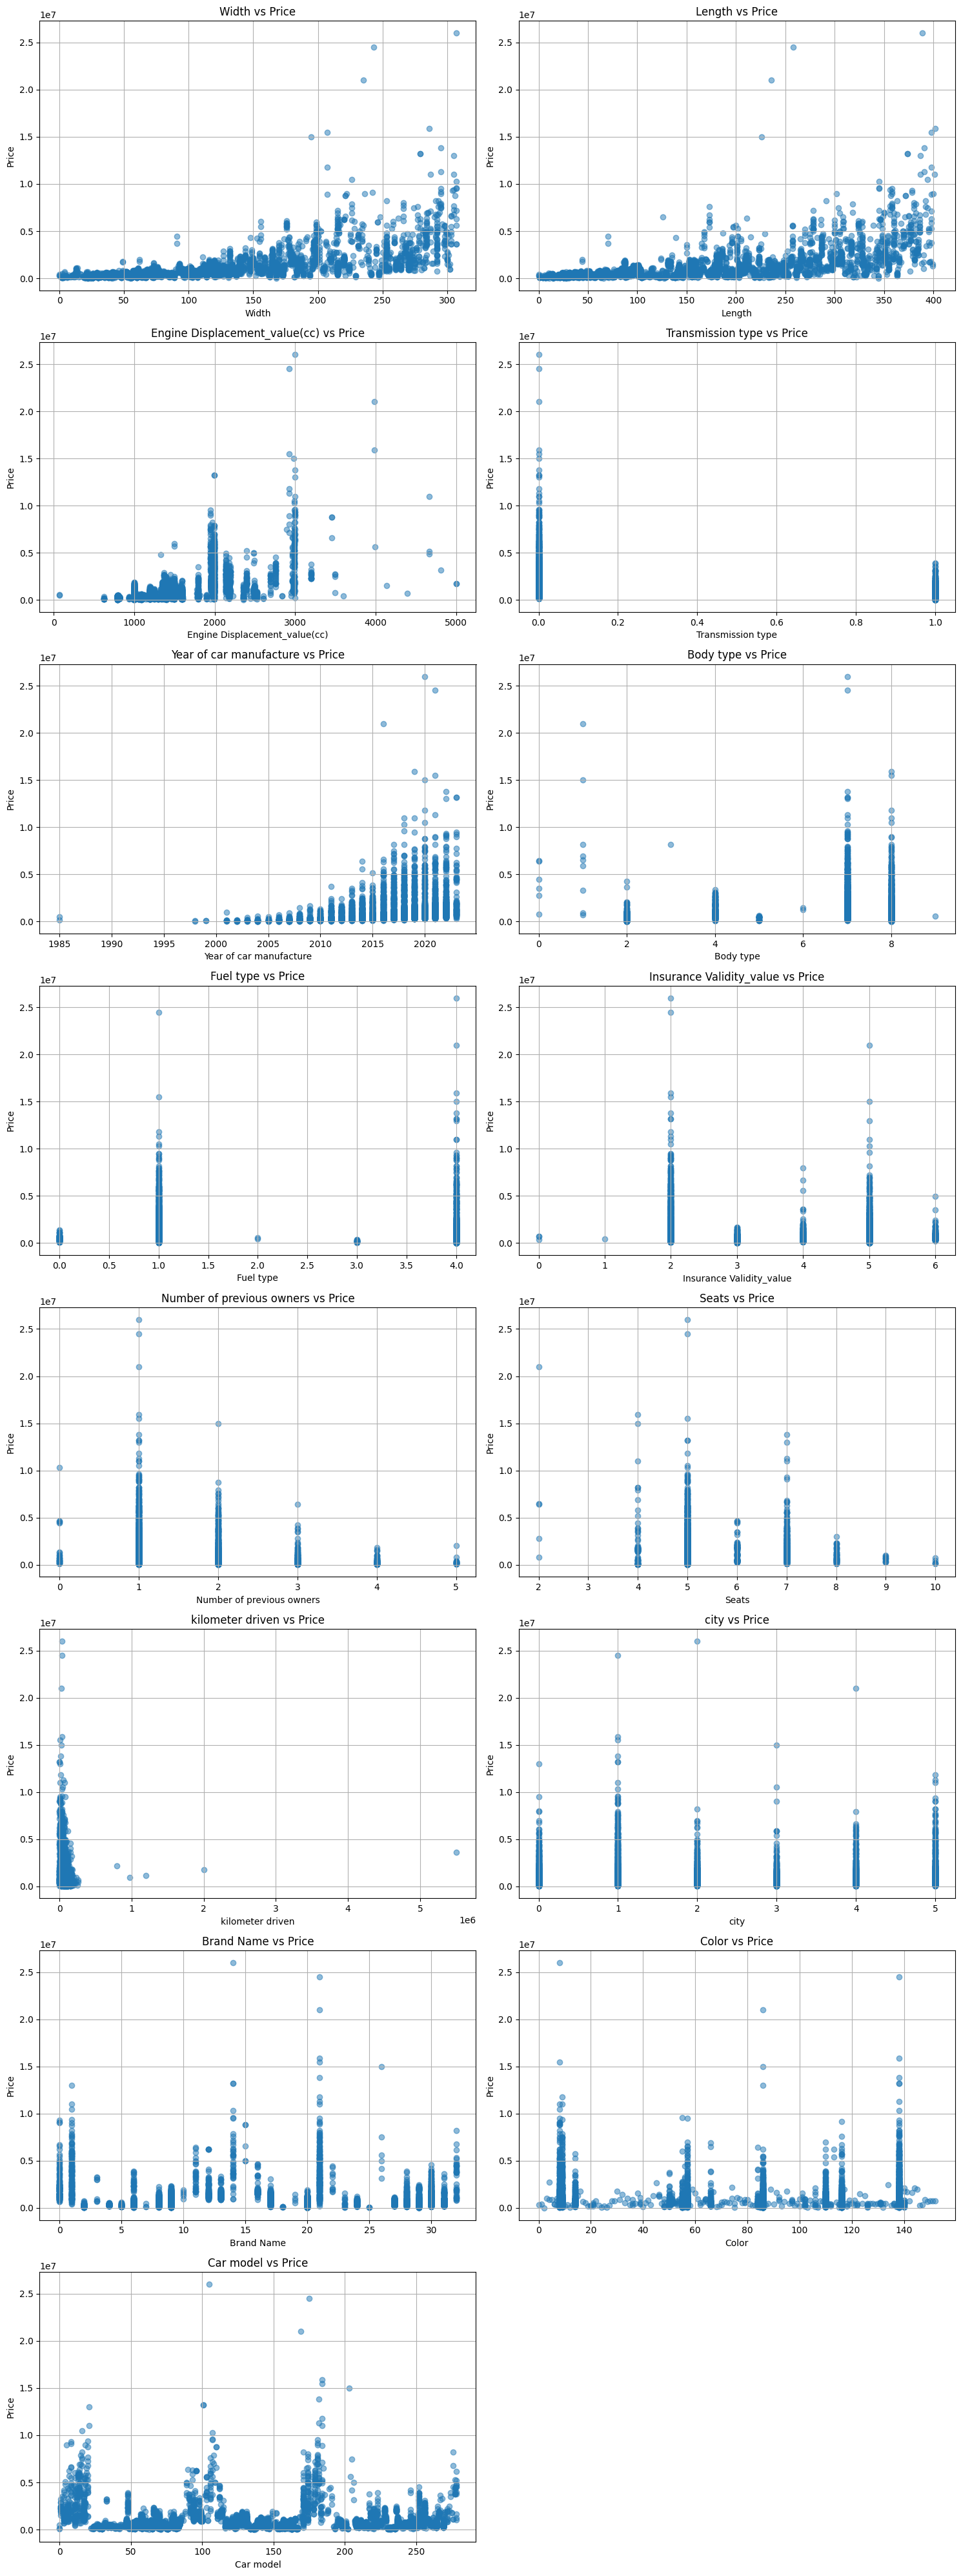

In [25]:
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Get the absolute correlation values with respect to 'price' and sort them
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

# Select top features correlated with price (excluding 'price' itself)
feature_columns = correlation_with_price.index[1:22]

# Plot scatter plots for top features
num_features = len(feature_columns)
rows = (num_features // 2) + (num_features % 2)  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * rows))
for i, feature in enumerate(feature_columns):
    plt.subplot(rows, 2, i + 1)  # Adjust layout based on the number of features
    plt.scatter(final_df[feature], final_df['price'], alpha=0.5)
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid()

plt.tight_layout()
plt.show()

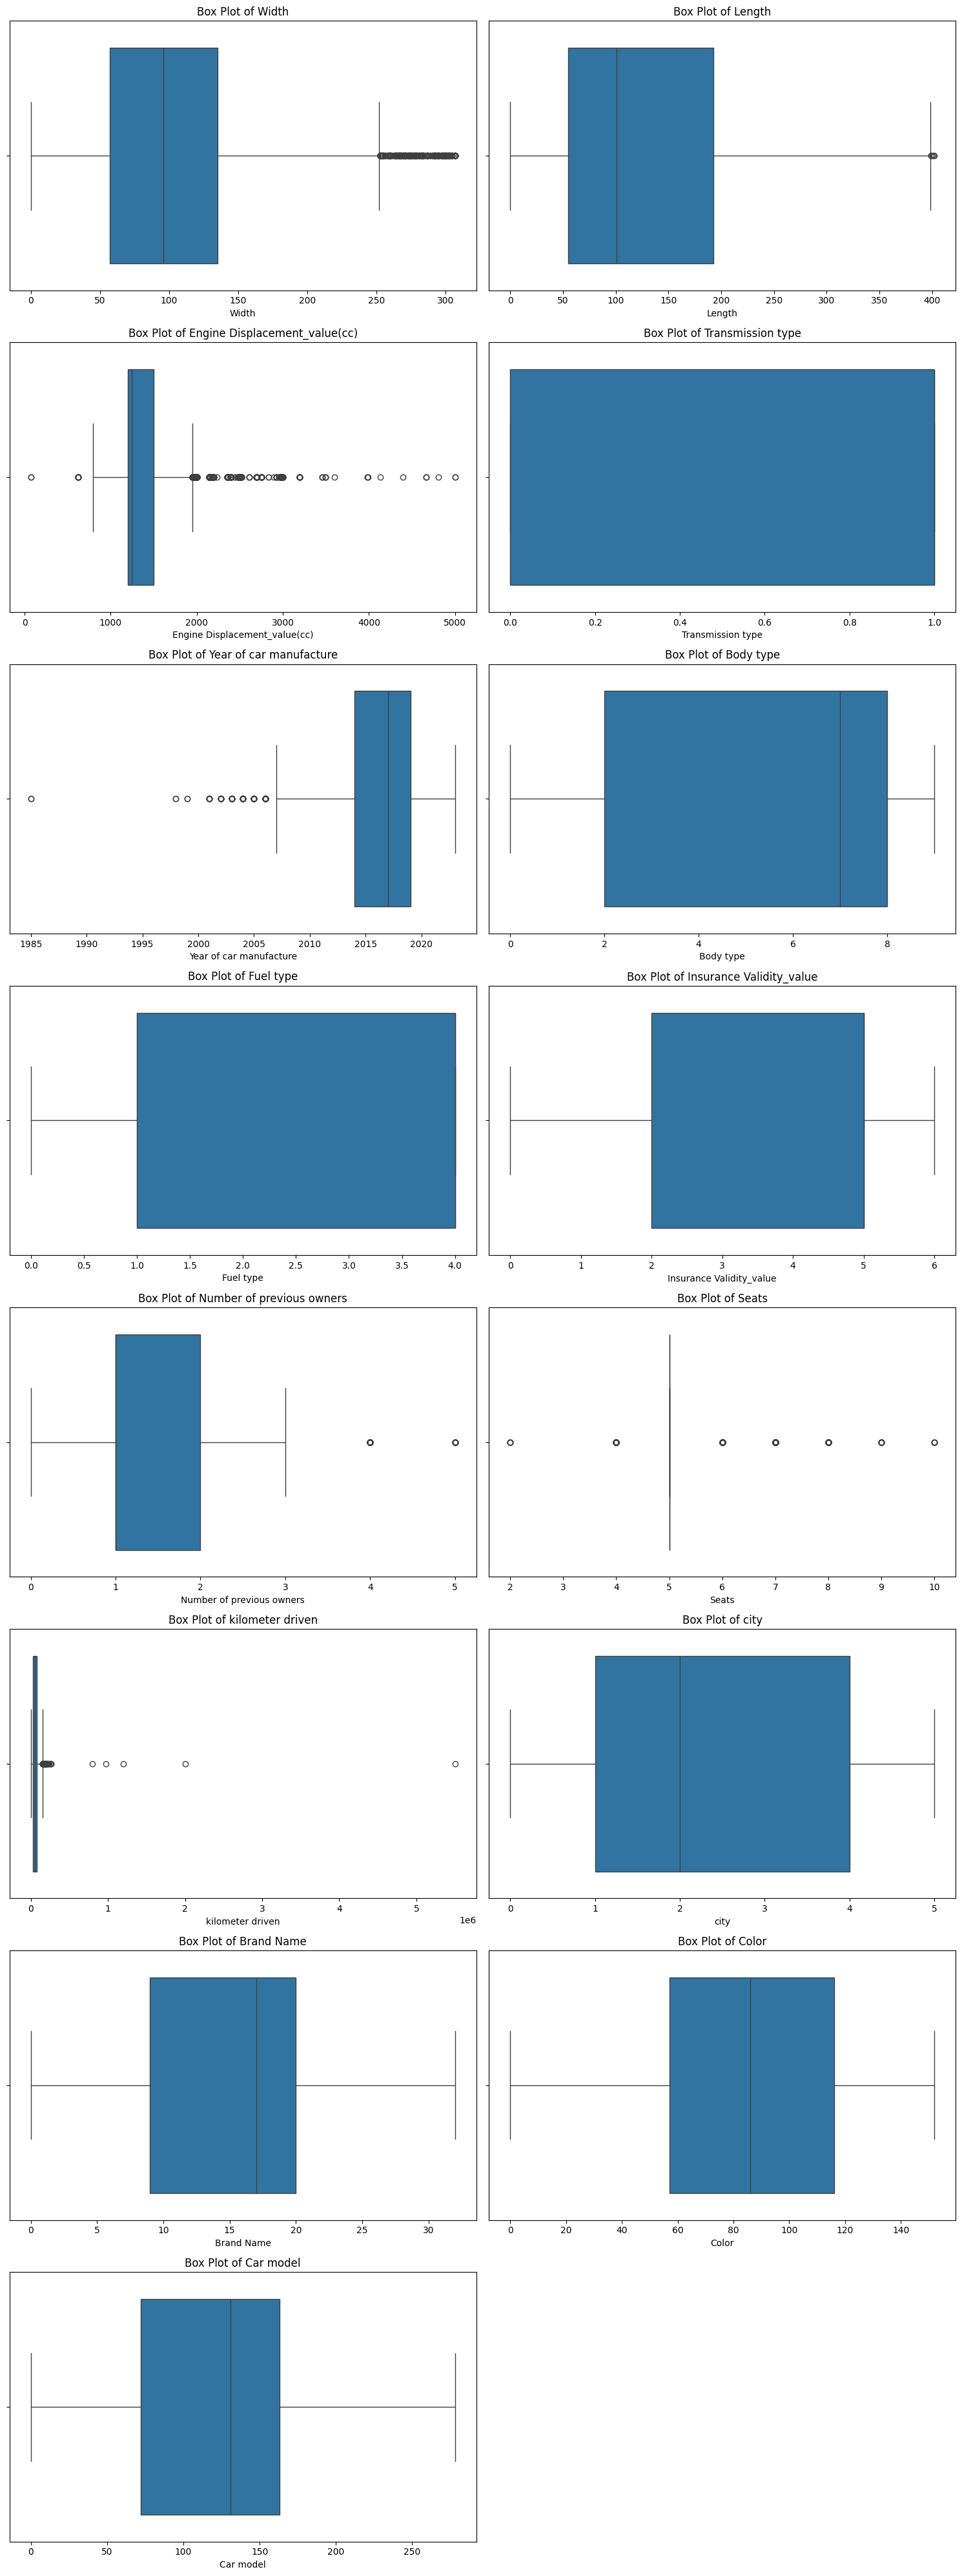

In [26]:
# 2. Box Plots for top features
plt.figure(figsize=(15, 5 * rows))
for i, feature in enumerate(feature_columns):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(x=final_df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

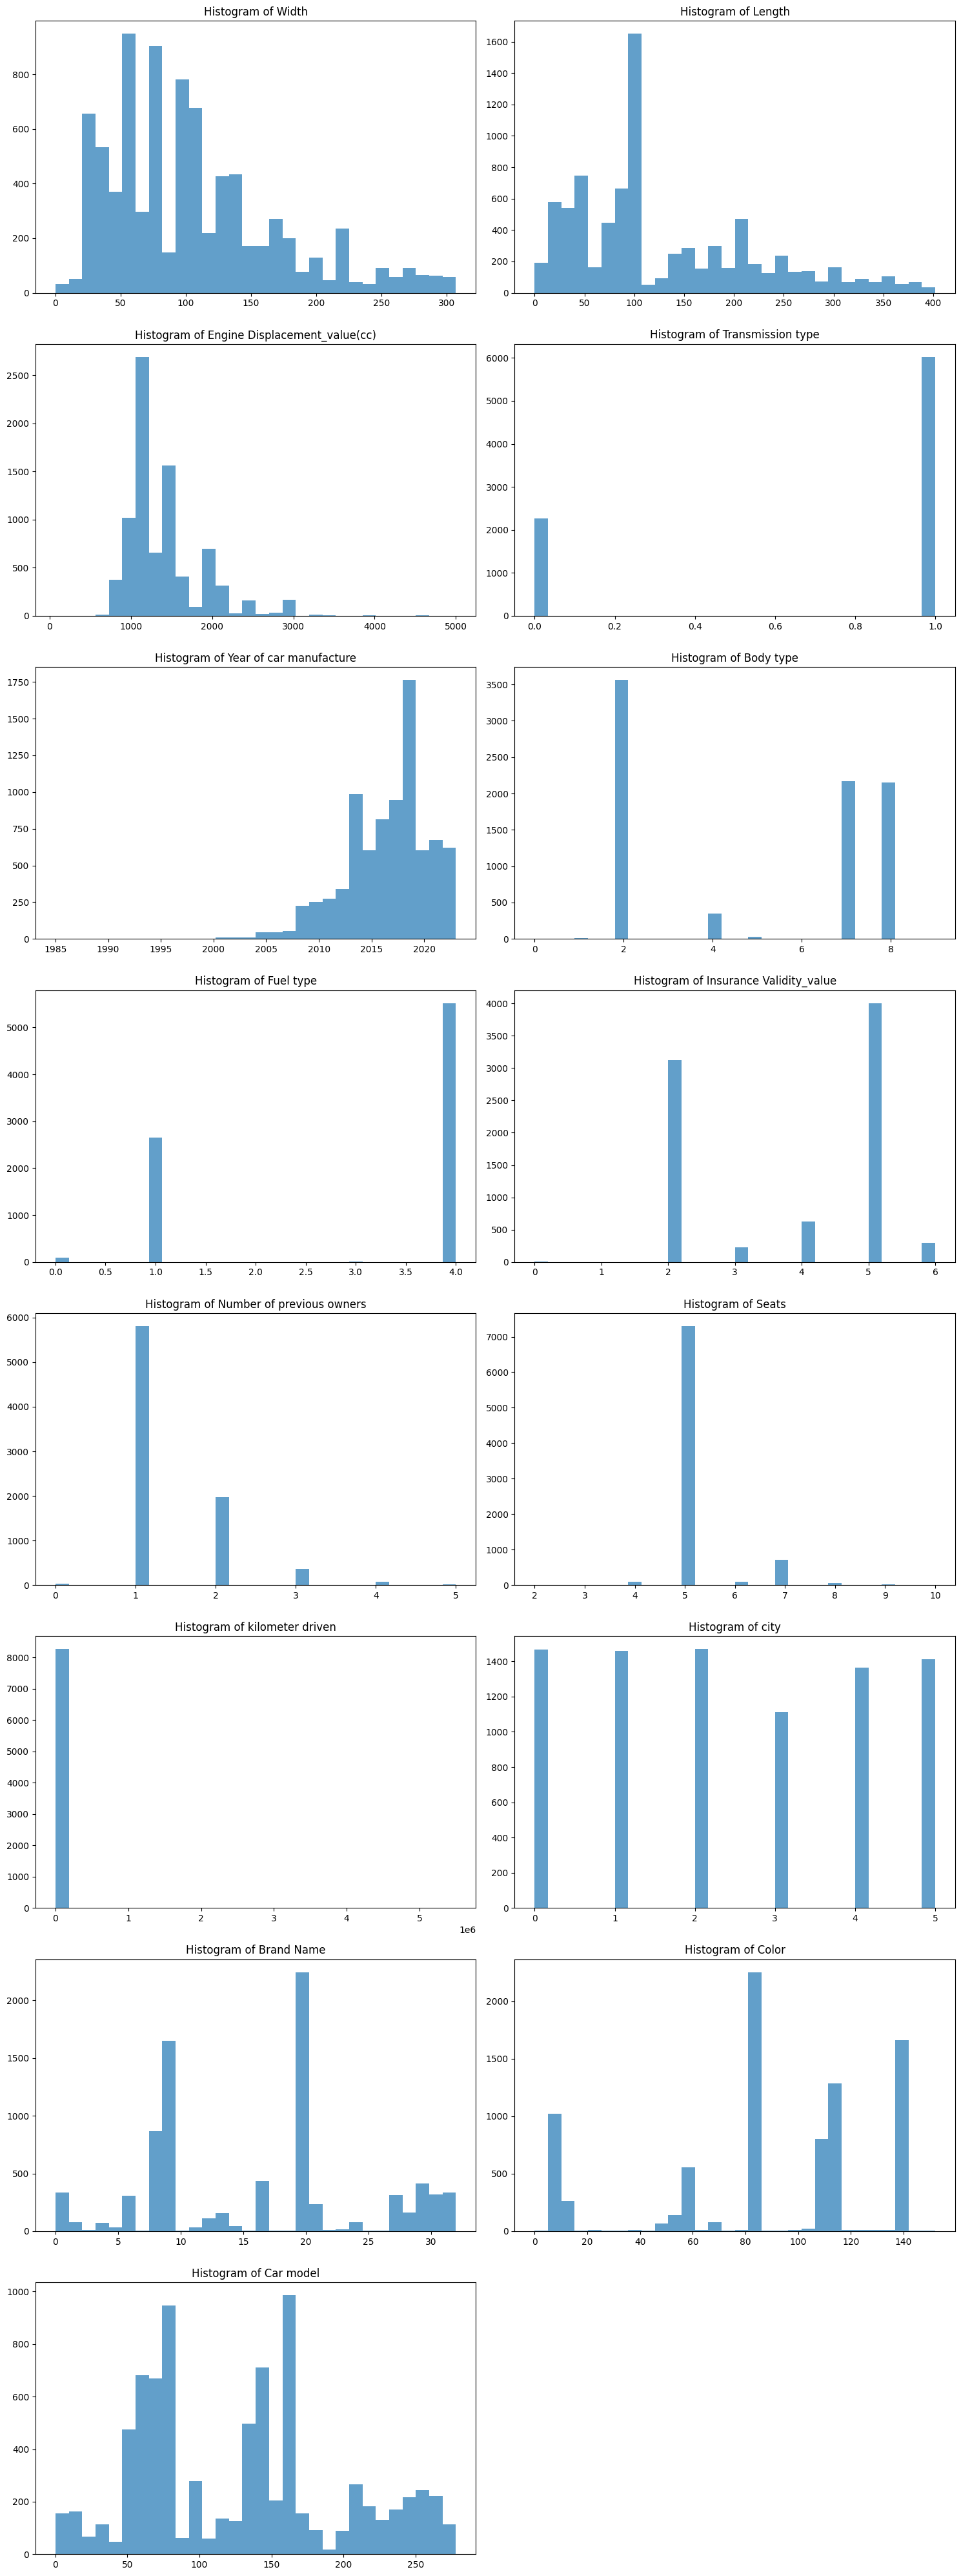

In [27]:
# 3. Histograms for top features
plt.figure(figsize=(15, 5 * rows))
for i, feature in enumerate(feature_columns):
    plt.subplot(rows, 2, i + 1)
    plt.hist(final_df[feature], bins=30, alpha=0.7)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

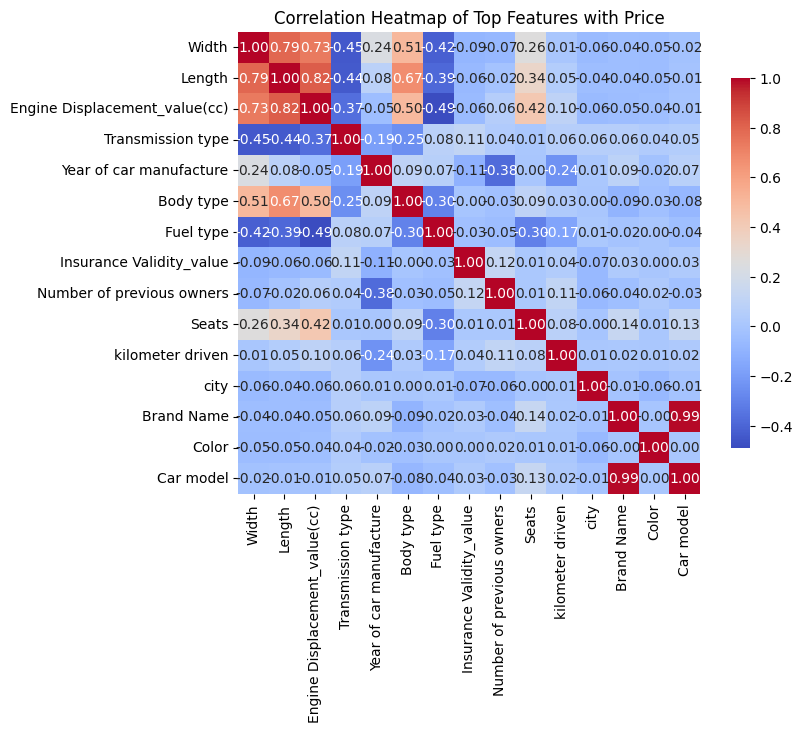

In [28]:
# 4. Correlation Heatmap for top features
plt.figure(figsize=(8, 6))
correlation_matrix = final_df[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Top Features with Price')
plt.show()


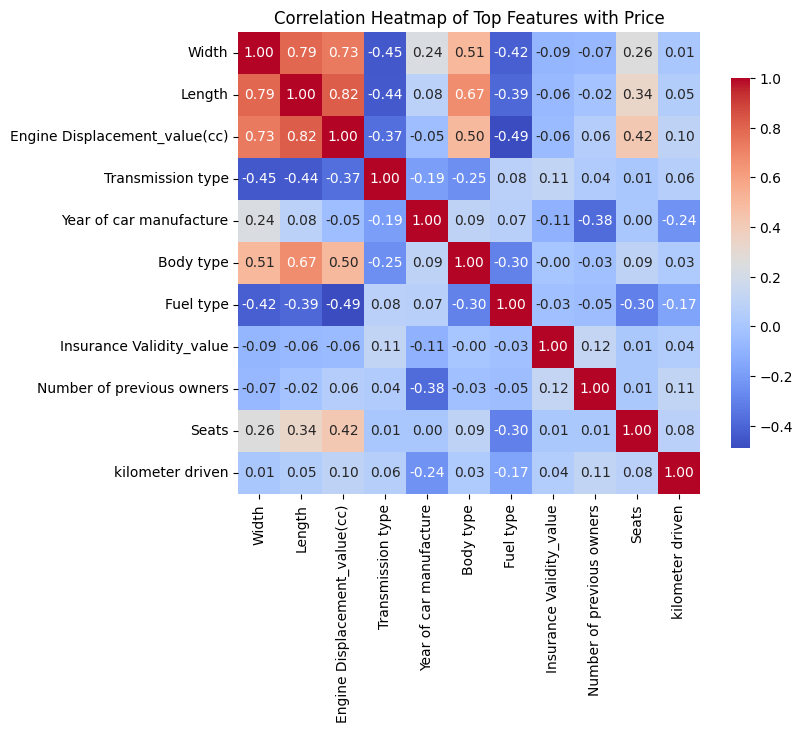

In [29]:
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Get the absolute correlation values with respect to 'price' and sort them
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

# Select top 10 features correlated with price (excluding 'price' itself)
feature_columns = correlation_with_price.index[0:12]  # Selecting top 10 features, excluding 'price'

features = feature_columns[feature_columns != 'price'] 

num_features = len(features)
rows = (num_features // 2) + (num_features % 2)  # Calculate number of rows needed

plt.figure(figsize=(8, 6))
correlation_matrix = final_df[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Top Features with Price')
plt.show()

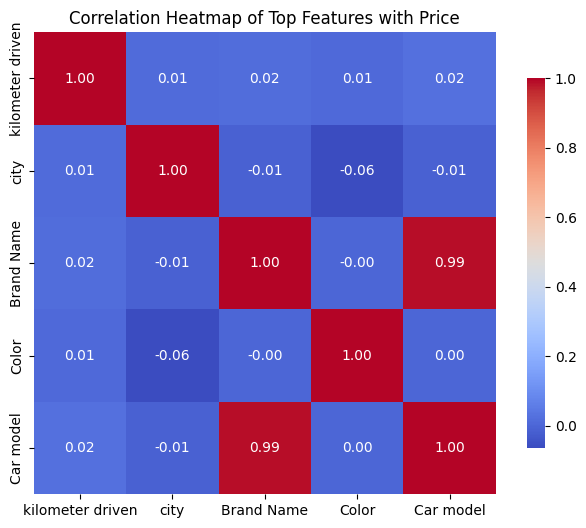

In [30]:
# 4. Correlation Heatmap for features

# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Get the absolute correlation values with respect to 'price' and sort them
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

# Select top 10 features correlated with price (excluding 'price' itself)
feature_columns = correlation_with_price.index[11:24]  # Selecting top 10 features, excluding 'price'

feature_columns = feature_columns[feature_columns != 'price'] 

num_features = len(feature_columns)
rows = (num_features // 2) + (num_features % 2)  # Calculate number of rows needed

plt.figure(figsize=(8, 6))
correlation_matrix = final_df[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Top Features with Price')
plt.show()